## Import the Preprocessed File 
### (Preprocessing Including Lemmatization and Removing Stopwords Done In Advance)

### Company Descriptions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('preprocessed.csv', 
                usecols = ['reportingDate', 'name', 
                           'coDescription_stopwords', 'SIC', 'SIC_desc'])
df

,reportingDate,name,SIC,SIC_desc,coDescription_stopwords
0,2018-02-01,"MONGODB, INC.",7372,Prepackaged Software (mass reproduction of sof...,mongodb leading modern general purpose databas...
1,2018-02-01,SALESFORCE COM INC,7372,Prepackaged Software (mass reproduction of sof...,salesforce global leader customer relationship...
2,2018-02-01,SPLUNK INC,7372,Prepackaged Software (mass reproduction of sof...,splunk provides innovative software solution e...
3,2018-02-01,"OKTA, INC.",7372,Prepackaged Software (mass reproduction of sof...,okta leading independent provider identity ent...
4,2018-02-01,VEEVA SYSTEMS INC,7372,Prepackaged Software (mass reproduction of sof...,veeva leading provider industry cloud solution...
...,...,...,...,...,...
670,2019-01-01,"AMERICAN REALTY CAPITAL NEW YORK CITY REIT, INC.",6798,Real Estate Investment Trusts,ationwe incorporated december maryland corpora...
671,2019-01-01,"CYCLACEL PHARMACEUTICALS, INC.",2834,Pharmaceutical Preparations,llowing business section contains statement ac...
672,2019-01-01,ZOETIS INC.,2834,Pharmaceutical Preparations,expense cost sale consist primarily cost mater...
673,2019-01-01,"STAG INDUSTRIAL, INC.",6798,Real Estate Investment Trusts,certain definitionsin report define gaap gener...


In [3]:
df.drop_duplicates()

,reportingDate,name,SIC,SIC_desc,coDescription_stopwords
0,2018-02-01,"MONGODB, INC.",7372,Prepackaged Software (mass reproduction of sof...,mongodb leading modern general purpose databas...
1,2018-02-01,SALESFORCE COM INC,7372,Prepackaged Software (mass reproduction of sof...,salesforce global leader customer relationship...
2,2018-02-01,SPLUNK INC,7372,Prepackaged Software (mass reproduction of sof...,splunk provides innovative software solution e...
3,2018-02-01,"OKTA, INC.",7372,Prepackaged Software (mass reproduction of sof...,okta leading independent provider identity ent...
4,2018-02-01,VEEVA SYSTEMS INC,7372,Prepackaged Software (mass reproduction of sof...,veeva leading provider industry cloud solution...
...,...,...,...,...,...
670,2019-01-01,"AMERICAN REALTY CAPITAL NEW YORK CITY REIT, INC.",6798,Real Estate Investment Trusts,ationwe incorporated december maryland corpora...
671,2019-01-01,"CYCLACEL PHARMACEUTICALS, INC.",2834,Pharmaceutical Preparations,llowing business section contains statement ac...
672,2019-01-01,ZOETIS INC.,2834,Pharmaceutical Preparations,expense cost sale consist primarily cost mater...
673,2019-01-01,"STAG INDUSTRIAL, INC.",6798,Real Estate Investment Trusts,certain definitionsin report define gaap gener...


### Words Counting

In [4]:
from sklearn.feature_extraction.text import CountVectorizer

Vectorizer = CountVectorizer(ngram_range = (2,4), 
                             max_features = 600)

count_data = Vectorizer.fit_transform(df['coDescription_stopwords'])

In [5]:
wordsCount = pd.DataFrame(count_data.toarray(),columns=Vectorizer.get_feature_names())

/Users/lulu/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [6]:
wordsCount = wordsCount.set_index(df['name'])

In [7]:
wordsCount

,ability make,accounting standard,acquire property,act act,act amended,additional information,adequately capitalized,adverse effect,adverse effect business,adverse event,...,wa million,weighted average,well capitalized,wholly owned,wholly owned subsidiary,wide range,within day,working interest,year ended,year ended december
name,,,,,,,,,,,,,,,,,,,,,
"MONGODB, INC.",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,3,0,0,5,0
SALESFORCE COM INC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SPLUNK INC,0,0,0,0,1,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"OKTA, INC.",0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
VEEVA SYSTEMS INC,0,12,0,1,4,1,0,7,4,0,...,18,4,0,0,0,0,1,0,102,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"AMERICAN REALTY CAPITAL NEW YORK CITY REIT, INC.",0,0,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,2,2
"CYCLACEL PHARMACEUTICALS, INC.",0,0,0,0,0,1,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
ZOETIS INC.,0,17,0,0,0,12,0,3,0,0,...,20,5,0,1,1,0,2,0,84,83


## Compute Cosine Similarity

In [8]:
# Compute Cosine Similarity
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = pd.DataFrame(cosine_similarity(wordsCount, wordsCount))

In [9]:
cosine_sim = cosine_sim.set_index(df['name'])
cosine_sim.columns = df['name']

In [10]:
cosine_sim

name,"MONGODB, INC.",SALESFORCE COM INC,SPLUNK INC,"OKTA, INC.",VEEVA SYSTEMS INC,AUTODESK INC,"INTERNATIONAL WESTERN PETROLEUM, INC.","DAYBREAK OIL & GAS, INC.","ETERNAL SPEECH, INC.","ETERNAL SPEECH, INC.",...,OMEGA HEALTHCARE INVESTORS INC,TABLEAU SOFTWARE INC,HORIZON PHARMA PLC,MERRIMACK PHARMACEUTICALS INC,"REVEN HOUSING REIT, INC.","AMERICAN REALTY CAPITAL NEW YORK CITY REIT, INC.","CYCLACEL PHARMACEUTICALS, INC.",ZOETIS INC.,"STAG INDUSTRIAL, INC.",EQUINIX INC
name,,,,,,,,,,,,,,,,,,,,,
"MONGODB, INC.",1.000000,0.445455,0.610272,0.620961,0.500762,0.338268,0.065380,0.052345,0.000000,0.000000,...,0.050935,0.630465,0.436327,0.143385,0.066598,0.135839,0.144678,0.189609,0.178397,0.102958
SALESFORCE COM INC,0.445455,1.000000,0.635969,0.455189,0.196053,0.418546,0.043515,0.064999,0.000000,0.000000,...,0.029326,0.492079,0.300027,0.133831,0.201221,0.201230,0.145089,0.075038,0.277952,0.354856
SPLUNK INC,0.610272,0.635969,1.000000,0.665648,0.274023,0.373142,0.019112,0.073553,0.000000,0.000000,...,0.018032,0.569939,0.330028,0.116923,0.109538,0.142041,0.128467,0.136418,0.194072,0.273502
"OKTA, INC.",0.620961,0.455189,0.665648,1.000000,0.195672,0.399874,0.013240,0.093942,0.000000,0.000000,...,0.013905,0.579884,0.541775,0.163709,0.109948,0.144051,0.170361,0.111937,0.163588,0.074624
VEEVA SYSTEMS INC,0.500762,0.196053,0.274023,0.195672,1.000000,0.079927,0.074096,0.030179,0.075713,0.075713,...,0.424046,0.280852,0.153335,0.083683,0.128762,0.211695,0.060273,0.501041,0.332207,0.064207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"AMERICAN REALTY CAPITAL NEW YORK CITY REIT, INC.",0.135839,0.201230,0.142041,0.144051,0.211695,0.106627,0.027594,0.048087,0.000000,0.000000,...,0.284525,0.114080,0.075274,0.048741,0.578793,1.000000,0.039971,0.136184,0.471651,0.042298
"CYCLACEL PHARMACEUTICALS, INC.",0.144678,0.145089,0.128467,0.170361,0.060273,0.094262,0.010770,0.025407,0.000000,0.000000,...,0.015318,0.193458,0.462759,0.683597,0.047288,0.039971,1.000000,0.035694,0.080139,0.013121
ZOETIS INC.,0.189609,0.075038,0.136418,0.111937,0.501041,0.069267,0.039015,0.022235,0.065917,0.065917,...,0.159082,0.327556,0.148224,0.051060,0.163391,0.136184,0.035694,1.000000,0.207232,0.031911


## Accuracy - Confusion Matrix / ROC Curves
### Predictions Based on the Closest Cosine Similarity Distance

In [77]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
def get_accuracy(cosine_matrix):
    """calculates percentage of correct category predictions based on 1-NN using dot product
    
    args: embedding matrix of size nxm (n companies each with an embedding of size m). NOTE: embeddings should be normalized.
    
    returns: float representation of percentage of correct category predictions
    """
    np.fill_diagonal(cosine_matrix.values, 0)
    cosine_matrix.index = df["SIC_desc"]
    cosine_matrix.columns = df["SIC_desc"]
    prediction = pd.DataFrame(cosine_matrix.idxmax(axis=1))
    prediction.reset_index(level=0, inplace=True)
    prediction.columns = ["y_true","y_pred"]
    return (prediction, np.sum(np.where(prediction.iloc[:,1] == prediction.iloc[:,0], 1, 0))/
                            len(prediction), confusion_matrix(prediction["y_true"], prediction["y_pred"], 
                                                                    labels=None, sample_weight=None, normalize='true'))

def conf_mat(matrix):
    prediction, accuracy, cm = get_accuracy(matrix)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=df["SIC_desc"].unique())
    disp.plot(xticks_rotation='vertical')
    disp.figure_.savefig('conf_mat.png', dpi=200, bbox_inches='tight')

    return prediction

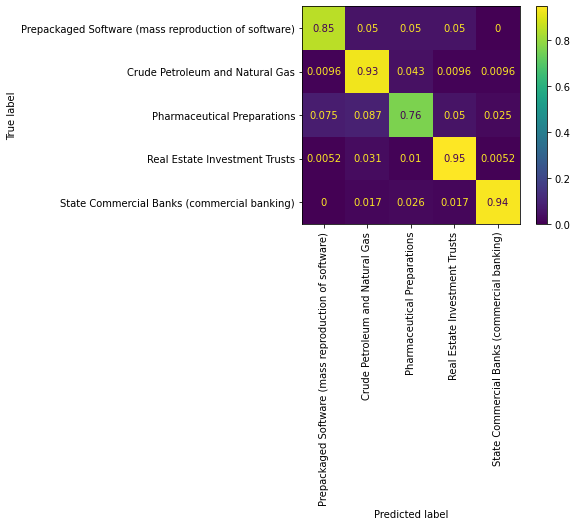

In [78]:
cosine_conf = conf_mat(cosine_sim)

In [54]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
def show_ROC_curves(df, similarity_matrix):
    for i in df["SIC_desc"].unique():
        y_true = similarity_matrix["y_true"] == i
        y_pred = similarity_matrix["y_pred"] == i
        fpr,tpr, _ = roc_curve(y_true, y_pred)
        roc_auc = auc(fpr, tpr)

        plt.plot(
            fpr,
            tpr,
            label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc),
        )
    plt.plot([0, 1], [0, 1], "k--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Some extension of Receiver operating characteristic to multiclass")
    plt.legend(loc="lower right")
    plt.savefig("ROC.png")
    plt.show()

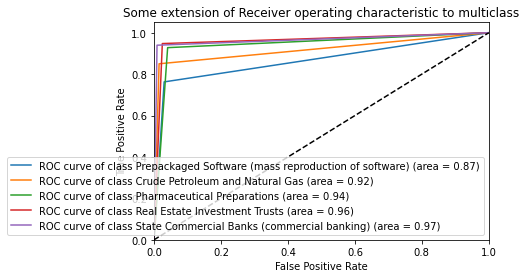

In [55]:
show_ROC_curves(df, cosine_conf)

## Plotting

### Plotting on the Cosine Similarity Matrix

In [21]:
#pip install -U kaleido

In [79]:
import os

if not os.path.exists("images"):
    os.mkdir("images")

In [80]:
from sklearn.decomposition import PCA
import plotly.express as px

# Referenced from Richard's CSCD25 course
def visualize(vectors, index, category):
    pca = PCA(n_components=10)
    pca_embedding = pca.fit_transform(vectors)
    pca_embedding = pd.DataFrame(pca_embedding, index = index)
    
    pca_embedding['SIC'] = list(category)
    pca_embedding['SIC'] = pca_embedding['SIC'].astype('category')
    
    fig = px.scatter(pca_embedding, x =0 , y = 1, 
                     hover_data={"Name": pca_embedding.index}, 
                     color = 'SIC', width=1200, height=750)
    fig.show()
    
    return [pca, pca_embedding]

In [81]:
plot_cos = visualize(cosine_sim, cosine_sim.index, df['SIC_desc'])

In [82]:
fig = px.scatter_3d(plot_cos[1], x =0 , y = 1, z = 2, hover_data={"name": plot_cos[1].index}, color = 'SIC', width=1200, height=700)
fig.write_image("images/fig_cos.png")
fig.show()

In [26]:
plot_cos[0].explained_variance_ratio_

array([0.43705121, 0.21549028, 0.13752174, 0.05257744, 0.03654605,
       0.01467293, 0.00914707, 0.00835553, 0.0072873 , 0.00633825])

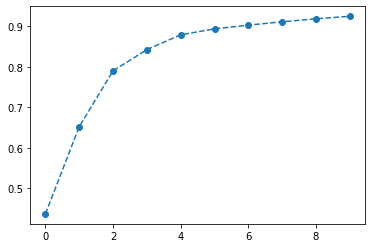

In [27]:
plt.plot(plot_cos[0].explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
# Since only the first three components can add up to 80% variance, choose 3 as the optimum number of features

## TF-IDF

In [56]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

In [57]:
pipe = Pipeline([('count', CountVectorizer(ngram_range = (2,4),
                                           max_features = 600)),
                 ('tfidf', TfidfTransformer())]).fit(df['coDescription_stopwords'])

In [59]:
# The 600 n-tuples selected as our features based on how many documents theyve appeared in
feature_names = pd.DataFrame(pipe['count'].get_feature_names())
feature_names

/Users/lulu/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



,0
0,ability make
1,accounting standard
2,acquire property
3,act act
4,act amended
...,...
595,wide range
596,within day
597,working interest
598,year ended


In [60]:
# The tf-idf matrix
tfidf = pd.DataFrame(pipe.transform(df['coDescription_stopwords']).toarray())

In [61]:
tfidf = tfidf.set_index(df['name'])
tfidf.columns = feature_names

In [62]:
tfidf

,"(ability make,)","(accounting standard,)","(acquire property,)","(act act,)","(act amended,)","(additional information,)","(adequately capitalized,)","(adverse effect,)","(adverse effect business,)","(adverse event,)",...,"(wa million,)","(weighted average,)","(well capitalized,)","(wholly owned,)","(wholly owned subsidiary,)","(wide range,)","(within day,)","(working interest,)","(year ended,)","(year ended december,)"
name,,,,,,,,,,,,,,,,,,,,,
"MONGODB, INC.",0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.00000,0.000000,0.142792,0.000000,0.0,0.159676,0.000000
SALESFORCE COM INC,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
SPLUNK INC,0.0,0.000000,0.000000,0.000000,0.028629,0.065079,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
"OKTA, INC.",0.0,0.000000,0.000000,0.000000,0.000000,0.060244,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.00000,0.000000,0.070677,0.000000,0.0,0.047421,0.000000
VEEVA SYSTEMS INC,0.0,0.036768,0.000000,0.002459,0.006749,0.001918,0.0,0.010931,0.009864,0.000000,...,0.050291,0.010562,0.0,0.00000,0.000000,0.000000,0.002393,0.0,0.153975,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"AMERICAN REALTY CAPITAL NEW YORK CITY REIT, INC.",0.0,0.000000,0.042749,0.000000,0.000000,0.026297,0.0,0.021414,0.000000,0.000000,...,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.041400,0.044572
"CYCLACEL PHARMACEUTICALS, INC.",0.0,0.000000,0.000000,0.000000,0.000000,0.010162,0.0,0.008275,0.000000,0.013216,...,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.012678,0.0,0.000000,0.000000
ZOETIS INC.,0.0,0.064136,0.000000,0.000000,0.000000,0.028336,0.0,0.005769,0.000000,0.000000,...,0.068805,0.016257,0.0,0.00275,0.002954,0.000000,0.005892,0.0,0.156135,0.166098


### Dot Product of TF-IDF Matrix

In [63]:
# get the dot product of tf-idf matrix
tfidf_dot = pd.DataFrame(np.dot(tfidf, tfidf.T))

In [64]:
tfidf_dot = tfidf_dot.set_index(df['name'])
tfidf_dot.columns = df['name']

In [65]:
tfidf_dot

name,"MONGODB, INC.",SALESFORCE COM INC,SPLUNK INC,"OKTA, INC.",VEEVA SYSTEMS INC,AUTODESK INC,"INTERNATIONAL WESTERN PETROLEUM, INC.","DAYBREAK OIL & GAS, INC.","ETERNAL SPEECH, INC.","ETERNAL SPEECH, INC.",...,OMEGA HEALTHCARE INVESTORS INC,TABLEAU SOFTWARE INC,HORIZON PHARMA PLC,MERRIMACK PHARMACEUTICALS INC,"REVEN HOUSING REIT, INC.","AMERICAN REALTY CAPITAL NEW YORK CITY REIT, INC.","CYCLACEL PHARMACEUTICALS, INC.",ZOETIS INC.,"STAG INDUSTRIAL, INC.",EQUINIX INC
name,,,,,,,,,,,,,,,,,,,,,
"MONGODB, INC.",1.000000,0.449021,0.630992,0.629693,0.501161,0.255621,0.043231,0.016761,0.000000,0.000000,...,0.024975,0.612552,0.336391,0.086985,0.031890,0.096497,0.075872,0.121530,0.086593,0.110289
SALESFORCE COM INC,0.449021,1.000000,0.644073,0.395046,0.237700,0.276395,0.018731,0.018926,0.000000,0.000000,...,0.015638,0.438298,0.136900,0.061512,0.111006,0.118469,0.061371,0.054762,0.124051,0.510446
SPLUNK INC,0.630992,0.644073,1.000000,0.572283,0.311616,0.211039,0.019323,0.019900,0.000000,0.000000,...,0.008478,0.584749,0.183350,0.058230,0.046701,0.070511,0.054761,0.104119,0.084378,0.311706
"OKTA, INC.",0.629693,0.395046,0.572283,1.000000,0.212697,0.289360,0.005444,0.032749,0.000000,0.000000,...,0.006223,0.583095,0.395867,0.112763,0.048977,0.079832,0.088776,0.087296,0.078044,0.034604
VEEVA SYSTEMS INC,0.501161,0.237700,0.311616,0.212697,1.000000,0.055806,0.042426,0.010629,0.104071,0.104071,...,0.238240,0.274555,0.102101,0.050697,0.077873,0.126198,0.032920,0.425137,0.158750,0.059136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"AMERICAN REALTY CAPITAL NEW YORK CITY REIT, INC.",0.096497,0.118469,0.070511,0.079832,0.126198,0.050767,0.023715,0.020630,0.000000,0.000000,...,0.217195,0.067877,0.047288,0.026572,0.481998,1.000000,0.019164,0.098146,0.324773,0.017671
"CYCLACEL PHARMACEUTICALS, INC.",0.075872,0.061371,0.054761,0.088776,0.032920,0.047601,0.003675,0.006329,0.000000,0.000000,...,0.006960,0.099380,0.409974,0.602231,0.017193,0.019164,1.000000,0.015657,0.027561,0.003156
ZOETIS INC.,0.121530,0.054762,0.104119,0.087296,0.425137,0.054934,0.018509,0.009091,0.092212,0.092212,...,0.124202,0.230904,0.099852,0.029056,0.092290,0.098146,0.015657,1.000000,0.111432,0.012161


In [39]:
## Predictions Based on the Closest TF-IDF

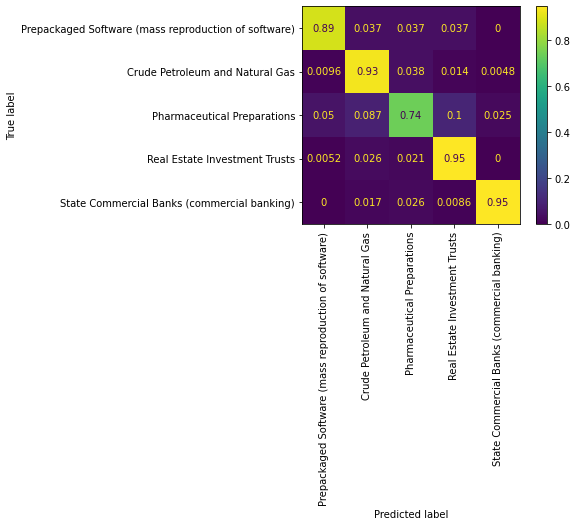

In [66]:
tfidf_conf = conf_mat(tfidf_dot)

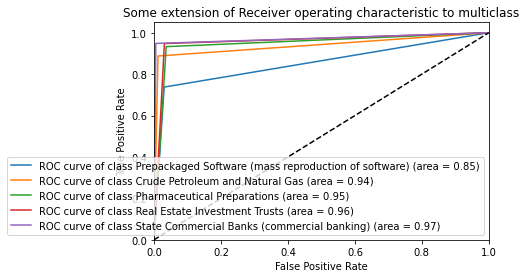

In [67]:
show_ROC_curves(df, tfidf_conf)

### Plotting the TF-IDF Matrix

In [42]:
plot_tfidf = visualize(tfidf, tfidf.index, df['SIC_desc'])

/Users/lulu/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.



In [43]:
fig = px.scatter_3d(plot_tfidf[1], x =0 , y = 1, z = 2, hover_data={"name": plot_cos[1].index}, color = 'SIC', width=1200, height=700)
fig.show()

In [44]:
plot_tfidf[0].explained_variance_ratio_

array([0.10934459, 0.08085876, 0.06108177, 0.03014576, 0.01853104,
       0.01701686, 0.01562624, 0.01515566, 0.01477303, 0.01385434])

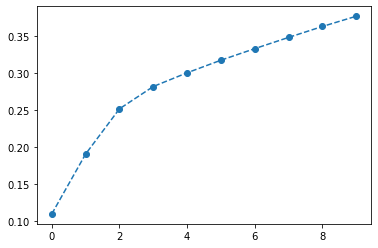

In [45]:
plt.plot(plot_tfidf[0].explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
# The first three components can only add up to 30% variance
# and all 10 components can only explain around 40%

### Plotting the TF-IDF Dot Product Matrix

In [46]:
plot_tfidf_dot = visualize(tfidf_dot, tfidf_dot.index, df['SIC_desc'])

In [47]:
fig = px.scatter_3d(plot_tfidf_dot[1], x =0 , y = 1, z = 2, hover_data={"name": plot_cos[1].index}, color = 'SIC', width=1200, height=700)
fig.write_image("images/fig_tfidf.png")
fig.show()

In [48]:
plot_tfidf[0].explained_variance_ratio_

array([0.10934459, 0.08085876, 0.06108177, 0.03014576, 0.01853104,
       0.01701686, 0.01562624, 0.01515566, 0.01477303, 0.01385434])

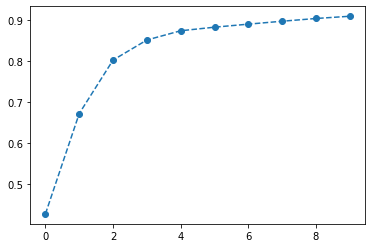

In [49]:
plt.plot(plot_tfidf_dot[0].explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
# The first two components can add up to 80% variance

In [50]:
components = pd.DataFrame(plot_tfidf_dot[0].components_)#, columns = feature_names)
components.reindex(components.abs().sort_values(0, axis = 1).index)

,0,1,2,3,4,5,6,7,8,9,...,665,666,667,668,669,670,671,672,673,674
0,-0.008236,-0.002602,-0.004692,-0.007974,0.000749,-0.005046,-0.001646,-0.001378,-0.000071,-0.000071,...,0.004040,-0.011101,-0.032764,-0.062165,0.008051,0.016355,-0.051551,0.003982,0.005381,0.000108
1,-0.003749,-0.004267,-0.006074,-0.001980,-0.013670,-0.000635,-0.051380,-0.035535,-0.002120,-0.002120,...,-0.018548,0.000623,0.030054,0.068707,-0.015716,-0.029416,0.055092,-0.012944,-0.025447,-0.006268
2,-0.018116,-0.016738,-0.016579,-0.016885,-0.019339,-0.010654,0.105160,0.078049,-0.002289,-0.002289,...,-0.024997,-0.015112,-0.003322,0.003433,-0.032661,-0.061046,0.004050,-0.017040,-0.039782,-0.007681
3,0.028332,0.025076,0.032830,0.025411,-0.005092,0.011539,-0.059463,-0.045410,0.003768,0.003768,...,-0.038021,0.014514,-0.011762,-0.055926,-0.039614,-0.074676,-0.033330,-0.012948,-0.045937,0.026707
4,0.128862,0.100741,0.123105,0.119538,0.058523,0.081594,0.008340,0.009818,-0.001306,-0.001306,...,0.003904,0.127640,0.027104,0.013343,-0.010019,-0.011359,-0.021261,0.037593,0.013957,0.026886
5,-0.039217,-0.083342,-0.072848,-0.054548,0.092836,-0.043735,-0.009550,-0.023228,0.032933,0.032933,...,0.092787,-0.018612,-0.026058,0.008192,-0.016186,-0.007149,-0.026884,0.123007,0.001269,-0.083921
6,0.047350,0.032589,0.046662,0.021963,0.097623,0.009376,-0.004739,0.014087,0.023515,0.023515,...,0.013724,0.055028,0.052172,-0.039306,-0.009112,0.005330,0.055803,0.110311,0.002115,0.019110
7,0.018823,0.020237,0.023845,0.012909,-0.001275,-0.002529,-0.028125,0.020530,-0.000052,-0.000052,...,-0.047150,0.032017,-0.008898,0.006348,-0.001891,-0.001704,-0.020150,0.034048,-0.085107,0.018652
8,0.022903,0.020083,0.035409,0.041699,-0.033252,0.011964,0.019752,-0.027697,-0.006972,-0.006972,...,-0.020566,0.005922,0.041740,0.012662,-0.005284,-0.017554,0.023694,-0.024356,-0.049731,-0.008042
9,0.013622,0.035280,0.016751,-0.000029,-0.009485,0.012630,0.045411,-0.012752,-0.013381,-0.013381,...,-0.024654,0.004954,-0.016106,-0.025543,0.019361,0.057007,0.010014,-0.085583,-0.004551,0.026317


In [51]:
feature_names

,0
0,ability make
1,accelerated approval
2,account receivable
3,accounting principle
4,accounting standard
...,...
995,working interest
996,would required
997,written notice
998,year ended
